In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
from astropy.io import fits
from matplotlib import colors
from astropy.wcs import WCS

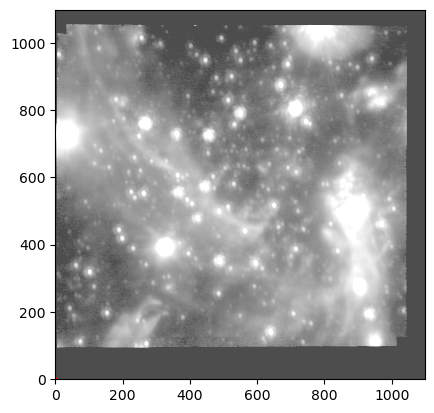

In [23]:
hdu_list = fits.open('/users/ava/Desktop/research/fits/mag20130424nirc2_lp.fits')
imgL = hdu_list[0].data
hdu_list[0].header

plt.imshow(imgL, cmap='gray', origin='lower', norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=.7)#, clim(0, 2e3))
pts = np.array([[.492326, .76434], [.570969, .824112], [.60497, .769043]])
plt.scatter(pts[:, 0], pts[:, 1], marker="o", color="red", s=2)
plt.show()

In [28]:
from astropy.io import fits

# Open the FITS file
hdul = fits.open('/users/ava/Desktop/research/fits/mag20130424nirc2_lp.fits')

# Get the image data and dimensions
image_data = hdul[0].data  # Assuming the image is in the primary HDU
rows, columns = image_data.shape

# Calculate the number of pixels
num_pixels = rows * columns

# Close the FITS file
hdul.close()

# Print the result
print(rows)
print(columns)
print(f"The FITS image contains {num_pixels} pixels.")

1099
1099
The FITS image contains 1207801 pixels.


In [29]:
filename =  '/users/ava/Desktop/research/lis/m20130424nirc2_lp_1_0.6_stf_cal.lis'
with open(filename) as f:
    for line in f:
        print(line)

       irs16C   8.284603  2013.313   458.54099   724.46503       23.39       1.00         2   40042100.000

      irs16NW   8.671603  2013.313   550.39697   789.82800       23.39       1.00         2   28024200.000

      irs16CC   9.188603  2013.313   361.88300   728.23199       23.39       1.00         2   17421800.000

       star_1   5.866603  2013.313   330.03400   393.00101       23.39       1.00         2  371436000.000

       irs29N   6.573603  2013.313   714.99902   803.51300       23.39       1.00         2  193550000.000

       star_3   7.283603  2013.313    35.97340   731.16901       23.39       0.78         1  100653000.000

       star_4   7.316603  2013.313    27.55380   729.99902       23.39       0.93         0   97640496.000

       star_5   7.383603  2013.313   884.33197   514.41101       23.39       0.93         2   91786400.000

      irs16NE   7.544603  2013.313   268.56699   758.57202       23.39       1.00         2   79160304.000

       star_7   5.792603  20

5.389250099999999
5.600749900000001
4.319499700000001
6.6705003000000005


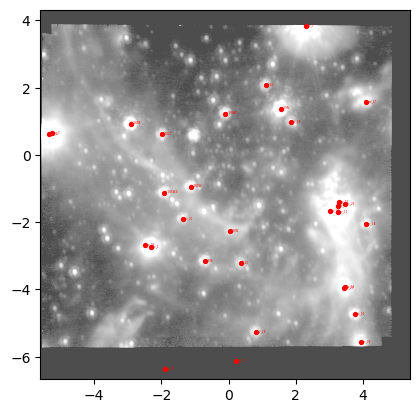

In [30]:
#Plotting stars in arcsecond relative to IRS16C

pixels_to_arcsec = 0.01 #I have found multiple numbers for this and not sure which is correct

pixels = 1099

x_offset = 1.01534/ 0.01
y_offset = 0.57415/ 0.01

x_pos = 458.54099 + x_offset
y_pos = 724.46503 - y_offset

right_arc = (pixels - x_pos)*0.01
left_arc = x_pos*0.01
up_arc = (pixels - y_pos)*0.01
down_arc = y_pos*0.01

print(right_arc)
print(left_arc)
print(up_arc)
print(down_arc)

starpos = np.loadtxt('/users/ava/Desktop/research/lis/m20130424nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[3, 4])
starpos_arcsec = starpos * pixels_to_arcsec

plt.imshow(imgL, cmap='gray', origin='lower', extent=[-left_arc, right_arc, -down_arc, up_arc], norm=colors.SymLogNorm(linthresh=1, linscale=0.3, vmin=5e2, vmax=2e4), zorder=-10, alpha=0.7)

starname = np.loadtxt('/users/ava/Desktop/research/lis/m20130424nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, dtype=str, usecols=[0])
magnitudes = np.loadtxt('/users/ava/Desktop/research/lis/m20130424nirc2_lp_1_0.6_stf_cal.lis', skiprows=1, usecols=[1])

for i in range(len(starname)):
    if magnitudes[i] <= 10:  # change magnitude threshold here 
        plt.scatter((starpos_arcsec[i, 0]-left_arc), (starpos_arcsec[i, 1]-down_arc), color='red', s=8)
        plt.annotate(starname[i], [starpos_arcsec[i, 0]-left_arc, starpos_arcsec[i, 1]-down_arc], color='red', size=2)

plt.show()